# Big Data Management and Analysis in Physics Research - Progetto

## Esercizio clustering e classificazione con NN - Consegna

In questo esercizio analizzeremo dei dati relativi al contagio di COVID-19 per cercare di creare un modello che ci aiuti a prevedere il numero di casi a livello globale.

Letto il dataset `data/covid.csv`, ci troveremo con i seguenti dati:
- Province/State: lo stato o la provincia a cui i dati fanno riferimento
- Country/Region: il paese a cui i dati fanno riferimento
- Lat: la latitudine dell'area di riferimeno
- Long: la longitudine dell'area di riferimento
- un numero di colonne, una per giorno, con i dati dei casi confermati

L'esercizio richiede di fare qualche analisi descrittivi. Ad esempio il grafico dei casi totali e magari il confronto tra alcuni Paesi (Italia, Francia, Germania).

Quindi si richiede di craere un modello con TensorFlow che prenda in input un coppia di dati x, y in cui:
- x è il numero di giorni passati dalla prima rivelazioen (22 gennaio 2020)
- y è il totale casi confermati da inizio del periodo fino al giorno

e provi a prevedere l'andamento dei casi positivi.

Si consiglie di partire con la creazione di una rete con i seguenti parametri:
- l'input deve essere un valore singolo
- possiamo quindi aggiungere un layer densamente connesso con 80 unità e activation='relu'
- possiamo quindi aggiungere un secondo layer densamente connesso con 80 unità e activation='relu'
- infine aggiungiamo un layer densamente connesso con 1 sola unità e activation='relu' che rappresenterà l'output

Il modello può quindi utilizzare l'ottimizzatore 'adam' e funzione di loss 'mean_squared_error'.
Vista la grandezza dei numeri trattati, per aiutare il modello ad apprendere le tendenze si consiglia infine di rappresentare i dati dei contagi totali in forma logaritmica utilizzando il metodo `np.log10(...)` che calcola il logaritmo in base 10, per far ritornare i dati nella forma originaria è possibile quindi effettuare una trasformazione con `np.pow(10, ...)`.

In [1]:
import pandas as pd
import numpy as np

Import data:

In [2]:
df = pd.read_csv("data/covid.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35


There are multiple rows for the same country, e.g., for the UK and China, corresponding to different provinces or islands.

In [3]:
df[df["Country/Region"] == "United Kingdom"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,99,99,109,109,110,110,111,114,114,114
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,66,70,70,70,70,70,73,73,74,74
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,521,523,525,525,525,530,537,537,538,543
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,133,133,136,141,141,141,141,144,144,144
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,307,308,308,308,308,309,313,315,316,320
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,138078,143464,148377,152840,157149,161145,165221,171253,177454,182260
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,6,6
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,11,11,11,11,12,12,12,12,12,12


In [4]:
df[df["Country/Region"] == "China"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,355,355,355,355,355,355,355,356,356,356
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1585,1585,1586,1587,1587,1588,1588,1588,1588,1588
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,328,328


For simplicity we group by country and sum all the daily covid cases.

In [5]:
grouped = df.groupby("Country/Region").sum().reset_index()

E.g., now there is only one row for China

In [6]:
grouped[grouped["Country/Region"] == "China"]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,83884,83899,83909,83912,83918,83940,83944,83956,83959,83959


We reshape the dataframe so that the countries are on the columns.

In [7]:
countries = grouped["Country/Region"]
grouped = grouped.drop(columns=["Country/Region", "Lat", "Long"]).transpose()
grouped.columns =  countries
grouped.index = pd.to_datetime(grouped.index)
grouped.index.rename("Date")

grouped.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


## Plots

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
dates = grouped.index

Let us plot the number of COVID-19 cases in a few European countries:

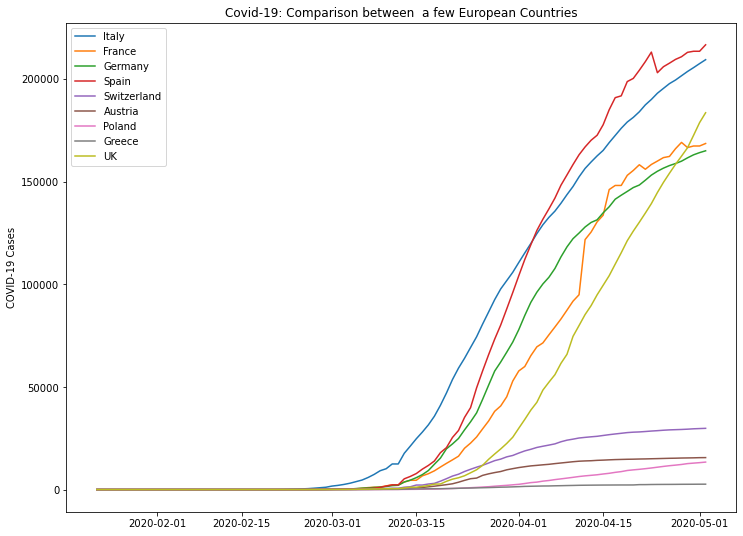

In [10]:
plt.figure(figsize=(12, 9))

sns.lineplot(dates, grouped.Italy, label="Italy")
sns.lineplot(dates, grouped.France, label="France")
sns.lineplot(dates, grouped.Germany, label="Germany")
sns.lineplot(dates, grouped.Spain, label="Spain")
sns.lineplot(dates, grouped.Switzerland, label="Switzerland")
sns.lineplot(dates, grouped.Austria, label="Austria")
sns.lineplot(dates, grouped.Poland, label="Poland")
sns.lineplot(dates, grouped.Greece, label="Greece")
sns.lineplot(dates, grouped["United Kingdom"], label= "UK")

plt.title("Covid-19: Comparison between  a few European Countries")
plt.ylabel("COVID-19 Cases")

plt.legend()
plt.show()

List of EU Countries:

In [11]:
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia",
                 "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
                 "Hungary", "Ireland", "Italy", "Latvia", "Luxembourg", "Lithuania", "Malta",
                 "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia",
                 "Spain", "Sweden"]

Time series of global and EU covid cases:

In [12]:
global_covid= np.sum(grouped.values, axis=1)
eu_covid = np.sum(grouped[eu_countries].values, axis=1)

Let us plot the time seriesof cases in the 10 countries with the most number of cases.

In [13]:
top10 = grouped.iloc[-1].sort_values()[::-1][:10]

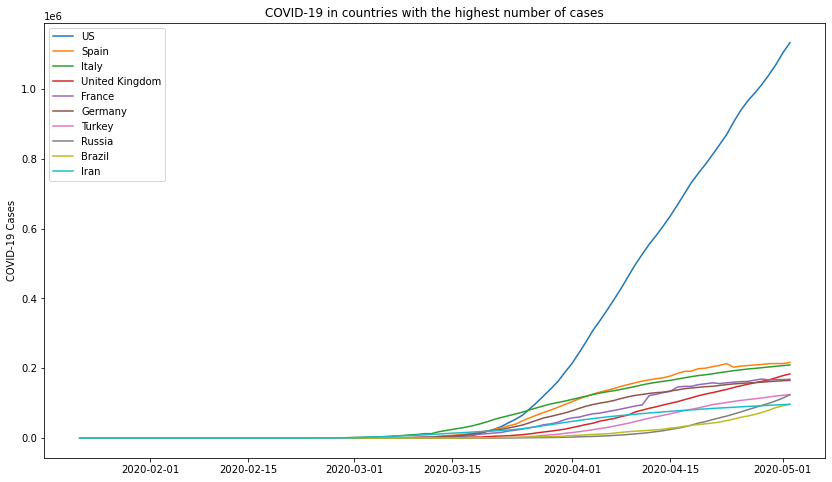

In [14]:
plt.figure(figsize=(14, 8))

for country in top10.index:
    sns.lineplot(dates, grouped[country], label= country)
    
plt.ylabel("COVID-19 Cases")
plt.title("COVID-19 in countries with the highest number of cases")
plt.show()

Text(0.5, 1.0, 'Covid19 cases')

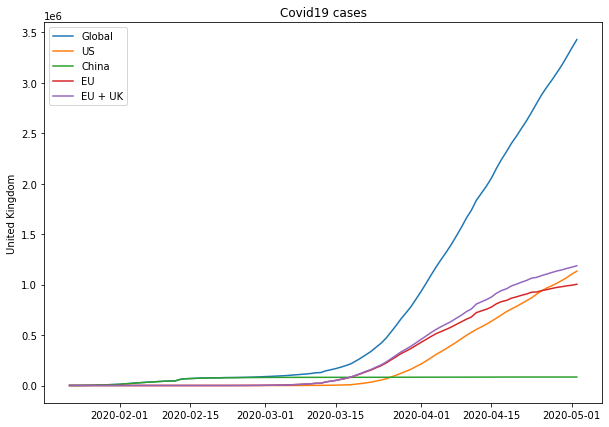

In [15]:
plt.figure(figsize=(10, 7))
sns.lineplot(dates, global_covid, label= "Global")
sns.lineplot(dates, grouped.US, label= "US")
sns.lineplot(dates, grouped.China, label= "China")
sns.lineplot(dates, eu_covid, label="EU")
sns.lineplot(dates, eu_covid + grouped["United Kingdom"], label="EU + UK")
plt.legend()
plt.title("Covid19 cases")

## Neural Network

### Train/test Split

Let us create a dataframe containing a time column and a column with the $\log_{10}$ of the global number of COVID-19 cases.

In [16]:
global_df = pd.DataFrame(data={"x" : np.arange(len(global_covid))+1,
                               "y" : np.log10(global_covid)}, columns=["x", "y"])

global_df.head()

,x,y
0,1,2.744293
1,2,2.815578
2,3,2.973590
3,4,3.156549
4,5,3.325926


Let us split the data in train/test sets:

In [17]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(global_df.x, global_df.y, test_size=0.2, random_state=0)

In [19]:
# scaler = MinMaxScaler()
# scaler = scaler.fit(y_train.values.reshape(-1,1))

In [20]:
# y_train_scaled = scaler.transform(y_train.values.reshape(-1,1))[:,0]
# y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))[:,0]

This is how the global data looks after applying the log transformation:

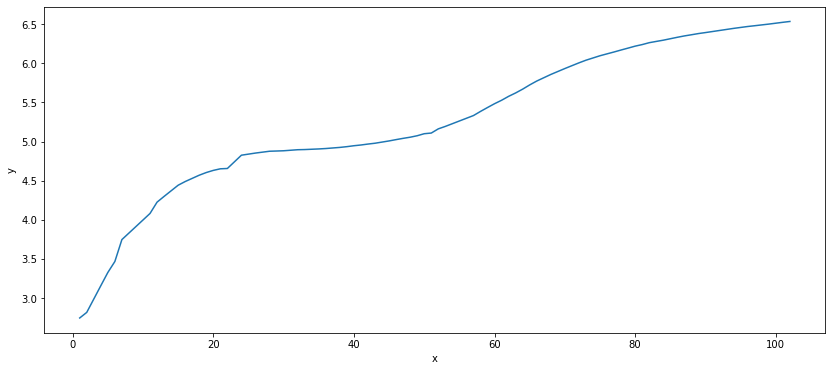

In [21]:
plt.figure(figsize=(14,6))
sns.lineplot(X_train, y_train)
plt.show()

In [22]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Si consiglia di partire con la creazione di una rete con i seguenti parametri:

- l'input deve essere un valore singolo
- possiamo quindi aggiungere un layer densamente connesso con 80 unità e activation='relu'
- possiamo quindi aggiungere un secondo layer densamente connesso con 80 unità e activation='relu'
- infine aggiungiamo un layer densamente connesso con 1 sola unità e activation='relu' che rappresenterà l'output

Il modello può quindi utilizzare l'ottimizzatore 'adam' e funzione di loss 'mean_squared_error'.
Vista la grandezza dei numeri trattati, per aiutare il modello ad apprendere le tendenze si consiglia infine di rappresentare i dati dei contagi totali in forma logaritmica utilizzando il metodo `np.log10(...)` che calcola il logaritmo in base 10, per far ritornare i dati nella forma originaria è possibile quindi effettuare una trasformazione con `np.pow(10, ...)`.

We choose 500 as the number of epochs, by we set up an `EarlyStopping` callback so that training stops after the loss on the test set does not improve for 20 epochs:

In [23]:
model = Sequential()

model.add(Dense(units=80, input_dim=1, activation='relu'))
model.add(Dense(units=80, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')

earlystop = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/500
3/3 [==============================] - 0s 109ms/step - loss: 5.7066 - val_loss: 4.5037
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 5.7918 - val_loss: 4.6343
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 3.4804 - val_loss: 5.6049
Epoch 4/500
3/3 [==============================] - 0s 24ms/step - loss: 4.6870 - val_loss: 4.8946
Epoch 5/500
3/3 [==============================] - 0s 36ms/step - loss: 3.5154 - val_loss: 4.1381
Epoch 6/500
3/3 [==============================] - 0s 29ms/step - loss: 3.7293 - val_loss: 4.1356
Epoch 7/500
3/3 [==============================] - 0s 30ms/step - loss: 3.2897 - val_loss: 4.1499
Epoch 8/500
3/3 [==============================] - 0s 44ms/step - loss: 3.4202 - val_loss: 4.4190
Epoch 9/500
3/3 [==============================] - 0s 32ms/step - loss: 3.2528 - val_loss: 3.8361
Epoch 10/500
3/3 [==============================] - 0s 22ms/step - loss: 3.0844 - val_loss: 3.8621
Epoch 11/500
3/3 [

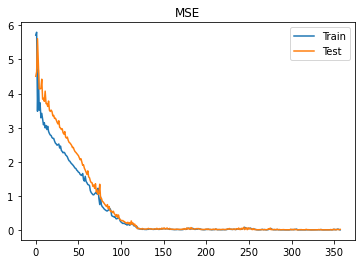

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSE')
plt.legend(['Train','Test'])
plt.show()

Performance on the train set:

In [25]:
model.evaluate(X_train, y_train)

3/3 [==============================] - 0s 4ms/step - loss: 0.0127


0.012745487503707409

The MSE on the train set is 0.012.

Performance on the test set:

In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0141


0.014073234051465988

The MSE on the test set is 0.014. The net does not seem to suffer from overfitting.

Predict next two weeks:

In [27]:
last_day =global_df.x.values[-1] 
n2w = np.arange(last_day + 14)
preds = np.power(10, model.predict(n2w))[:,0]

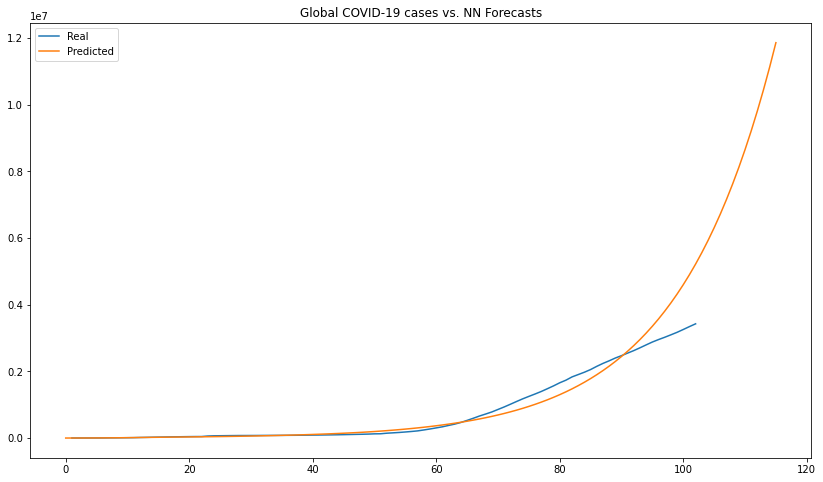

In [28]:
plt.figure(figsize=(14,8))
sns.lineplot(global_df.x.values, global_covid, label="Real")
sns.lineplot(n2w, preds, label="Predicted")
plt.legend()
plt.title("Global COVID-19 cases vs. NN Forecasts")
plt.show()